In [5]:
import tensorflow as tf
import numpy as np

from keras import applications
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.models import Sequential, Model 
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Input, Lambda
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import optimizers, callbacks
from keras import regularizers
import math
import sklearn as sk
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint

#import cv2

gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))



F:\Users\boopla00\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
# dimensions of our images.
img_width, img_height = 256, 256 
crop_size = (256, 256)

base_model_path = 'model_best.h5'

train_data_dir ='Apical3_additionalDepths_1to7_Interleave/Train'
validation_data_dir ='Apical3_additionalDepths_1to7_Interleave/Validation'
test_data_dir ='Apical3_additionalDepths_1to7_Interleave/Test'


# number of epochs to train top model
nepochs = 40 

# batch size used by flow_from_directory and predict_generator
batch_size=32


In [7]:
#base_model1 = load_model(base_model_path)
#base_model1.summary()

In [8]:
#base_model = Model(inputs=base_model1.input, outputs=base_model1.get_layer('mixed10').output)
#base_model.summary()

In [9]:
def mean_subtract(img):   
#     img = tf.subtract(img, 35.5161)
    img = tf.subtract(img, 41.89329/255.0)
    return img

Found 9673 images belonging to 7 classes.
Found 3719 images belonging to 7 classes.
7
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 12)                21826796  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                832       
_____________________________________

302/302 [==============================] - 4613s 15s/step - loss: 0.2138 - acc: 0.9464 - val_loss: 0.2071 - val_acc: 0.9433

Epoch 00029: val_acc did not improve from 0.95986
Epoch 30/40
302/302 [==============================] - 4781s 16s/step - loss: 0.1997 - acc: 0.9527 - val_loss: 0.1869 - val_acc: 0.9477

Epoch 00030: val_acc did not improve from 0.95986
Epoch 31/40
302/302 [==============================] - 4749s 16s/step - loss: 0.2003 - acc: 0.9510 - val_loss: 0.2480 - val_acc: 0.9238

Epoch 00031: val_acc did not improve from 0.95986
Epoch 32/40
302/302 [==============================] - 4734s 16s/step - loss: 0.1872 - acc: 0.9553 - val_loss: 0.1377 - val_acc: 0.9626

Epoch 00032: val_acc improved from 0.95986 to 0.96257, saving model to MyApical3_additionalDepths_1to7_Interleave.h5
Epoch 33/40
302/302 [==============================] - 4761s 16s/step - loss: 0.2022 - acc: 0.9523 - val_loss: 0.1695 - val_acc: 0.9520

Epoch 00033: val_acc did not improve from 0.96257
Epoch 34/4

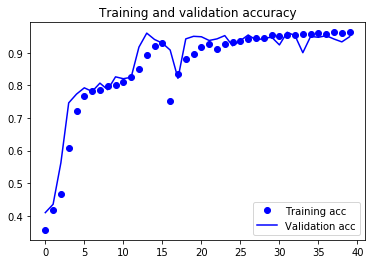

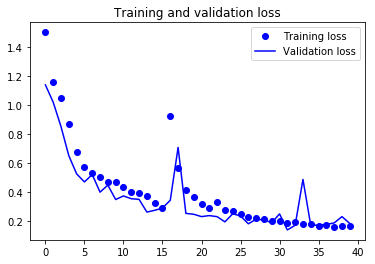

(3687, 7)
[[3.73290845e-07 2.62485937e-05 2.19831776e-07 ... 1.06712105e-02
  9.85263944e-01 4.03798511e-03]
 [3.48969166e-07 2.24793112e-05 1.78828699e-07 ... 9.46392771e-03
  9.85843778e-01 4.66929888e-03]
 [3.46377192e-07 2.21564533e-05 1.75556181e-07 ... 9.36126895e-03
  9.85888541e-01 4.72748093e-03]
 ...
 [3.49991438e-07 2.13476305e-05 1.67091599e-07 ... 8.81187990e-03
  9.85964298e-01 5.20186871e-03]
 [3.59500518e-07 2.36467204e-05 1.90894866e-07 ... 9.77482554e-03
  9.85684276e-01 4.51662997e-03]
 [3.64501687e-07 2.10222952e-05 1.70237570e-07 ... 7.90367462e-03
  9.85815525e-01 6.25926908e-03]]


In [10]:
train_datagen_top = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    height_shift_range=0.05, #0.2, #
    width_shift_range=0.05, #0.2, #
    rotation_range=15, #40, #15,
    shear_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=[0.9,1.25],
    rescale=1/255.0)

# train generator
train_generator_top = train_datagen_top.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True)


nb_train_samples = len(train_generator_top.filenames)
num_classes = len(train_generator_top.class_indices)

train_labels = train_generator_top.classes
train_labels = to_categorical(train_labels, num_classes= num_classes)

#validation generator
valid_datagen_top = ImageDataGenerator(rescale=1. / 255)

valid_generator_top = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_validation_samples = len(valid_generator_top.filenames)
validation_labels = valid_generator_top.classes
validation_labels = to_categorical(
    validation_labels, num_classes=num_classes)


print(len(train_generator_top.class_indices))
print(train_labels)
print(validation_labels)

# crop
#train_generator_crops = crop_generator(train_generator_top, crop_size)
#validation_generator_crops = crop_generator(valid_generator_top, crop_size)


#######
base_model = load_model(base_model_path)
#base_model.layers.pop()
#base_model.outputs = [base_model.layers[-1].output]
#base_model.layers[-1].outbound_nodes = []
#base_model.summary()
base_model.built = False 

input_shape = (256,256,1)
model_input = Input(shape = input_shape)
model_input = Lambda(mean_subtract, name='mean_subtraction')(model_input)
base_model.Input = model_input


#########
## dense model
model = Sequential()
model.add(base_model) # add base model
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(64, activation='relu')) # new
#model.add(Dropout(0.5)) #new
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary() 



print("[INFO] compile...")
#model.compile(optimizer='rmsprop',
#            loss='categorical_crossentropy', metrics=['accuracy'])


#sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
mydecay = 0.0005
mymomentum = 0.9
mylr = 0.01 #0.009 #0.01 #0.03 #0.001 #0.1 #0.01
sgd = optimizers.SGD(lr=mylr, decay=mydecay, momentum=mymomentum)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

print("[INFO] model fit...")
#history = model.fit_generator(train_generator_crops,
#                    steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                    epochs= nepochs,
#                    validation_data= validation_generator_crops,
#                    validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                    verbose=1)

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('MyApical3_additionalDepths_1to7_Interleave.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator_top,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=nepochs,
    validation_data= valid_generator_top,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=callbacks_list,
    verbose=1)

#history = model.fit_generator(train_generator_top,
#                steps_per_epoch= nb_train_samples//batch_size, #100, #50,  #1000,
#                epochs= nepochs,
#                validation_data= valid_generator_top,
#                validation_steps= nb_validation_samples//batch_size, #50, #8, #50, # 800,
#                verbose=1)
#

#base_model.save_weights(top_model_weights_path)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
y_classes = predictions.argmax(axis=-1)
print(predictions.shape)
print (predictions)

    

In [11]:
import pandas as pd
model.evaluate_generator(generator=valid_generator_top, steps = nb_validation_samples // batch_size)


# create test generator with valid directory ( due to lack of data)
valid_generator = valid_datagen_top.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 

valid_generator.reset()
pred=model.predict_generator(valid_generator,steps = len(valid_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

print(len(predictions))

filenames=valid_generator.filenames
#print(filenames.shape)
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_validation.csv",index=False)

Found 3719 images belonging to 7 classes.
3719/3719 [==============================] - 427s 115ms/step
3719


In [12]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
valid_generator.reset()
predCM=model.predict_generator(valid_generator,steps = len(valid_generator),verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7' ]
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion MatrixPredict...
3719/3719 [==============================] - 427s 115ms/step
Confusion Matrix
[[563  12   1   0   0   0   0]
 [  4 548  16   7   1   0   0]
 [  0  19 473  82   1   1   0]
 [  0   1  34 459   3   0   0]
 [  0   0   0   0 496   2   0]
 [  0   0   0   0   0 494   4]
 [  0   0   0   0   0   0 498]]
Classification Report
              precision    recall  f1-score   support

      Depth1       0.99      0.98      0.99       576
      Depth2       0.94      0.95      0.95       576
      Depth3       0.90      0.82      0.86       576
      Depth4       0.84      0.92      0.88       497
      Depth5       0.99      1.00      0.99       498
      Depth6       0.99      0.99      0.99       498
      Depth7       0.99      1.00      1.00       498

   micro avg       0.95      0.95      0.95      3719
   macro avg       0.95      0.95      0.95      3719
weighted avg       0.95      0.95      0.95      3719



In [13]:
import pandas as pd

test_data_dir ='Apical3_additionalDepths_1to7_Interleave/Test'

test_datagen_top = ImageDataGenerator(rescale=1. / 255)

test_generator_top = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=False) #True

nb_test_samples = len(test_generator_top.filenames)

test_loss, test_acc = model.evaluate_generator(generator=test_generator_top, steps = nb_test_samples//batch_size)

print('test acc:', test_acc)

# create test generator with actual test data
test_generator = test_datagen_top.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    color_mode='grayscale',
    class_mode=None, 
    shuffle=False,
    seed=42) 



test_generator.reset()
pred=model.predict_generator(test_generator, steps = len(test_generator), verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator_top.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

#predictions= model.predict_generator(valid_generator_top, steps = nb_validation_samples // batch_size)
#y_classes = predictions.argmax(axis=-1)
#print(predictions.shape)
#print (predictions)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_forTestdata.csv",index=False)

Found 3020 images belonging to 7 classes.
test acc: 0.9394946808510638
Found 3020 images belonging to 7 classes.
3020/3020 [==============================] - 345s 114ms/step


In [14]:
#print (predictions)
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

#confusion_matrix(valid_generator_top.classes, y_classes)
print('Confusion MatrixPredict...')
test_generator.reset()
predCM=model.predict_generator(test_generator,steps = len(test_generator), verbose=1)
y_pred = predCM.argmax(axis=-1) #np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Depth1', 'Depth2', 'Depth3', 'Depth4', 'Depth5','Depth6','Depth7']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))



Confusion MatrixPredict...
3020/3020 [==============================] - 345s 114ms/step
Confusion Matrix
[[473   9   0   0   0   0   0]
 [  4 446  26   6   0   0   0]
 [  0  38 382  60   2   0   0]
 [  0   0  32 362   4   0   0]
 [  0   0   0   0 392   0   0]
 [  0   0   0   0   0 391   1]
 [  0   0   0   0   0   0 392]]
Classification Report
              precision    recall  f1-score   support

      Depth1       0.99      0.98      0.99       482
      Depth2       0.90      0.93      0.91       482
      Depth3       0.87      0.79      0.83       482
      Depth4       0.85      0.91      0.88       398
      Depth5       0.98      1.00      0.99       392
      Depth6       1.00      1.00      1.00       392
      Depth7       1.00      1.00      1.00       392

   micro avg       0.94      0.94      0.94      3020
   macro avg       0.94      0.94      0.94      3020
weighted avg       0.94      0.94      0.94      3020

